# **Import Lib...**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,make_scorer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import *
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
# # Mount Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# # Reading Data
# encoding = 'latin1'
# df = pd.read_csv('/content/drive/MyDrive/Spotify_capstone_project/loan_approval_dataset.csv',  encoding=encoding)
df = pd.read_csv('loan_approval_dataset.csv')

**Reading Data and Understanding of Data**

In [4]:
# top 5 rows
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
# Data shape
df.shape

(4269, 13)

In [6]:
# dtypes of Each Col
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [7]:
# Columns in dataset
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [8]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [9]:
# Describe Data Set
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# **Data Preprocessing**

**null value and duplicates Treatment**

In [10]:
# Checking Null Values
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [11]:
# Checking Duplicates
df.duplicated().sum()

0

In [12]:
# Checking No of Unique values in each col
df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

In [13]:
# Droping Loan Id from Df
df.drop('loan_id', axis=1, inplace=True)

In [14]:
# Avail Cols in Df
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [15]:
# correcting col names format
df.columns = df.columns.str.strip()
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [16]:
# Removing extra Space from oject col data
cols =['loan_status', 'education','self_employed']
for i in cols:
    df[i] = df[i].str.strip()

In [17]:
# value count %
print('loan_status- Rejected (%):',(df['loan_status'].value_counts()['Rejected']/df['loan_status'].shape[0])*100)
print('loan_status-Approved (%):',(df['loan_status'].value_counts()['Approved']/df['loan_status'].shape[0])*100)

loan_status- Rejected (%): 37.78402436167721
loan_status-Approved (%): 62.215975638322796


**Checking Non-Numerical Cols**




In [18]:
cols =df.select_dtypes(include='object').columns
print(cols)

Index(['education', 'self_employed', 'loan_status'], dtype='object')


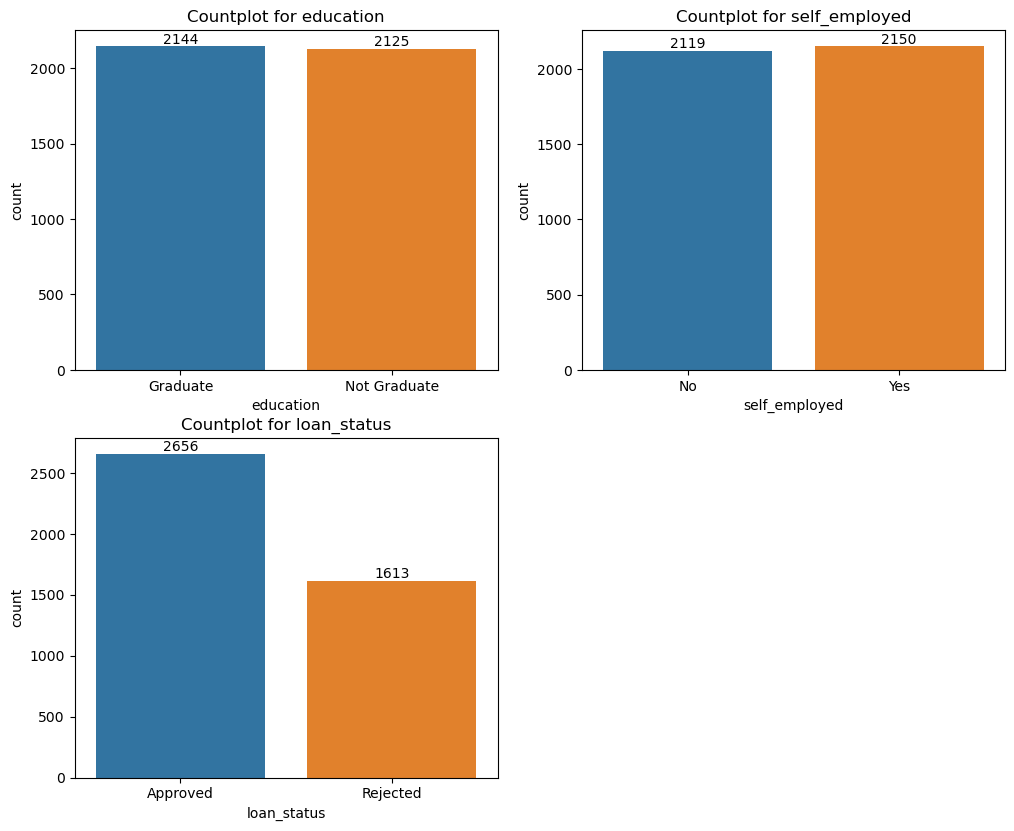

In [19]:
# Count Plot for non- numerical Cols
plt.figure(figsize=(12,15))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(x=df[cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cols[i]}')
plt.show()

**Checking Numerical Cols**

In [20]:
num_cols =df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')


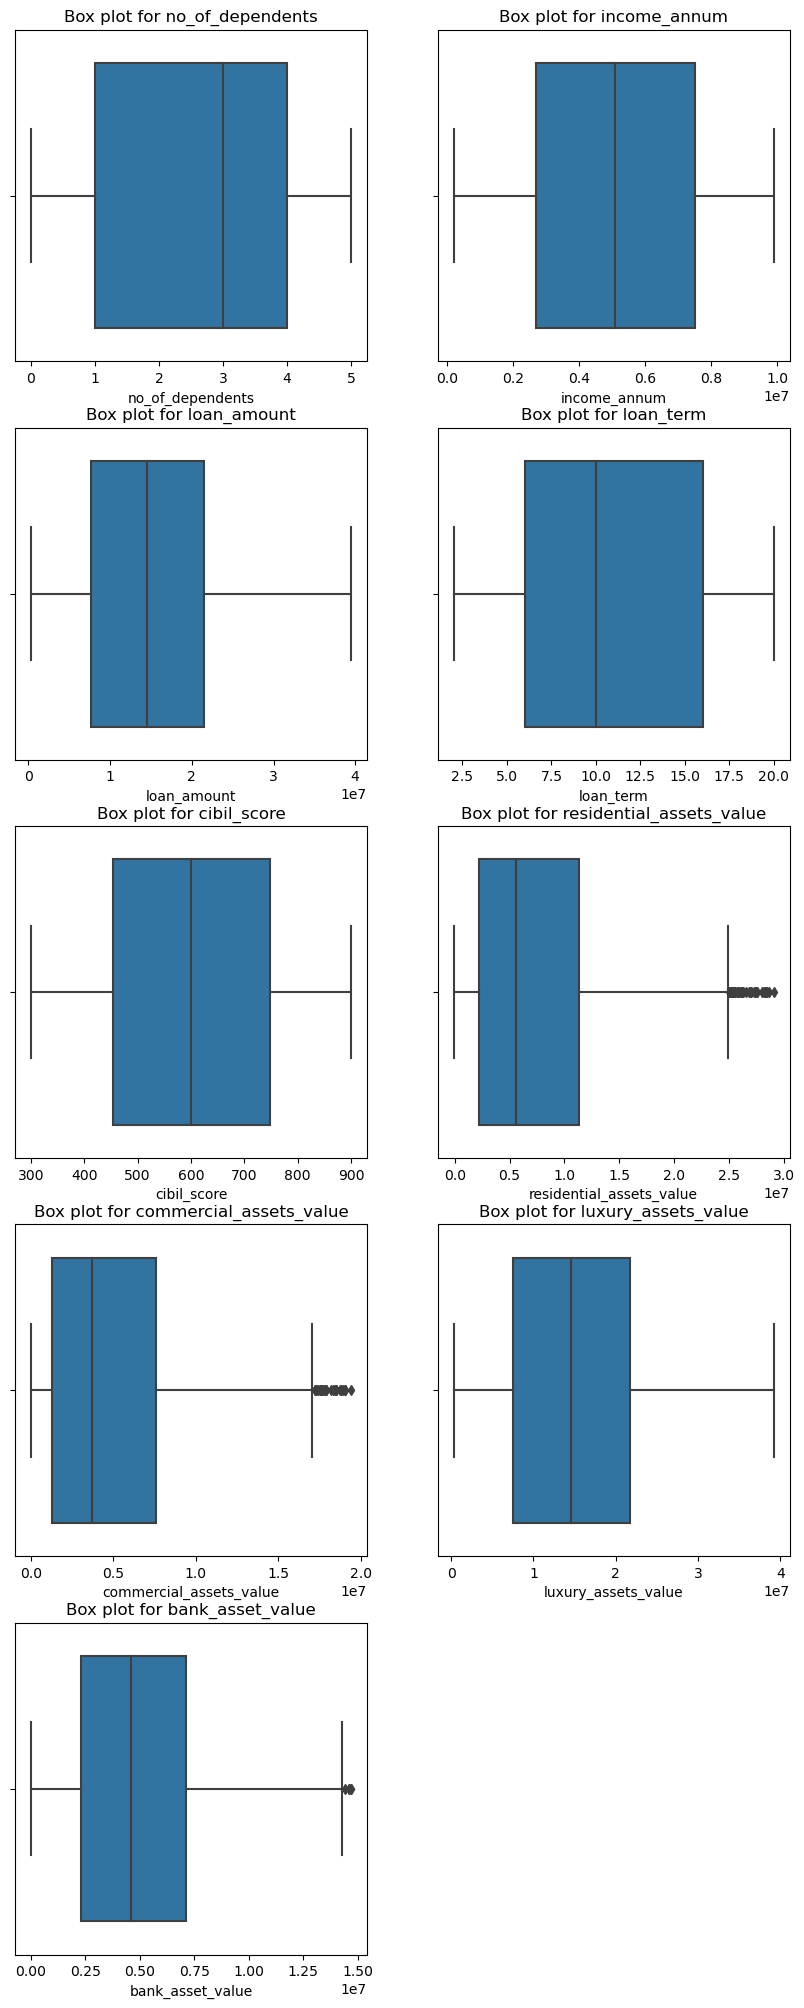

In [21]:
# Box Plot for numerical Cols
plt.figure(figsize=(10,25))
for i in range(len(num_cols)):
    plt.subplot(5,2,i+1)
    ax = sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Box plot for {num_cols[i]}')
plt.show()

In [22]:
# desc diff per of data
cols_with_outliers = ['residential_assets_value','commercial_assets_value', 'bank_asset_value']
a1 = df[cols_with_outliers].describe(percentiles=[0.75,0.80,0.85,0.90,
                                    0.95,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,50%,75%,80%,85%,90%,95%,97%,98%,99%,max
residential_assets_value,-100000.0,5600000.0,11300000.0,12940000.0,14800000.0,17200000.0,21260000.0,22900000.0,23964000.0,25400000.0,29100000.0
commercial_assets_value,0.0,3700000.0,7600000.0,8800000.0,10080000.0,11700000.0,13900000.0,15296000.0,16100000.0,16732000.0,19400000.0
bank_asset_value,0.0,4600000.0,7100000.0,7800000.0,8700000.0,9700000.0,11100000.0,11900000.0,12400000.0,13100000.0,14700000.0


In [23]:
# Checking the count
print('residential_assets_value:', df[df['residential_assets_value']>25400000.0].shape[0])
print('commercial_assets_value:',df[df['commercial_assets_value']>16732000.0].shape[0])
print('bank_asset_value:', df[df['bank_asset_value']>13100000.0].shape[0])


residential_assets_value: 40
commercial_assets_value: 43
bank_asset_value: 41


In [24]:
# Treating Ouliers
df['residential_assets_value'] = np.where(df['residential_assets_value']>25400000.0, 25400000.0, df['residential_assets_value'])
df['commercial_assets_value'] = np.where(df['commercial_assets_value']>16732000.0, 16732000.0, df['commercial_assets_value'])
df['bank_asset_value'] = np.where(df['bank_asset_value']>13100000.0, 13100000.0, df['bank_asset_value'])

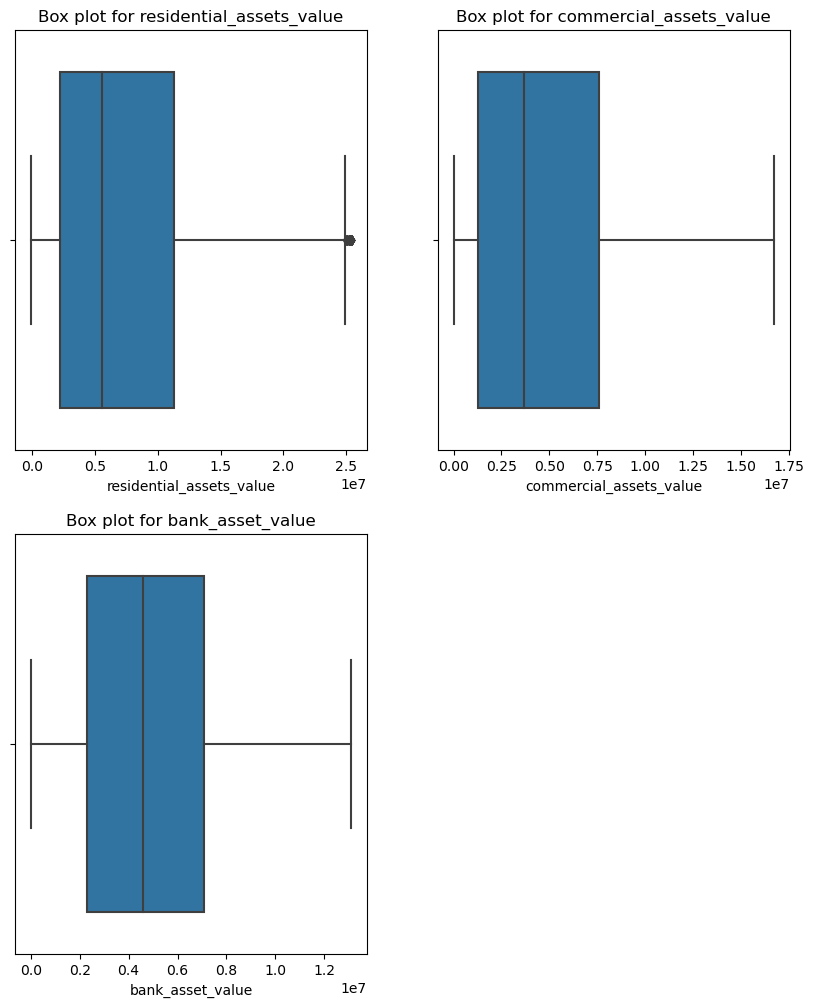

In [25]:
# Box Plot after treating outliers
plt.figure(figsize=(10,12))
for i in range(len(cols_with_outliers)):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x=df[cols_with_outliers[i]])
    plt.title(f'Box plot for {cols_with_outliers[i]}')
plt.show()

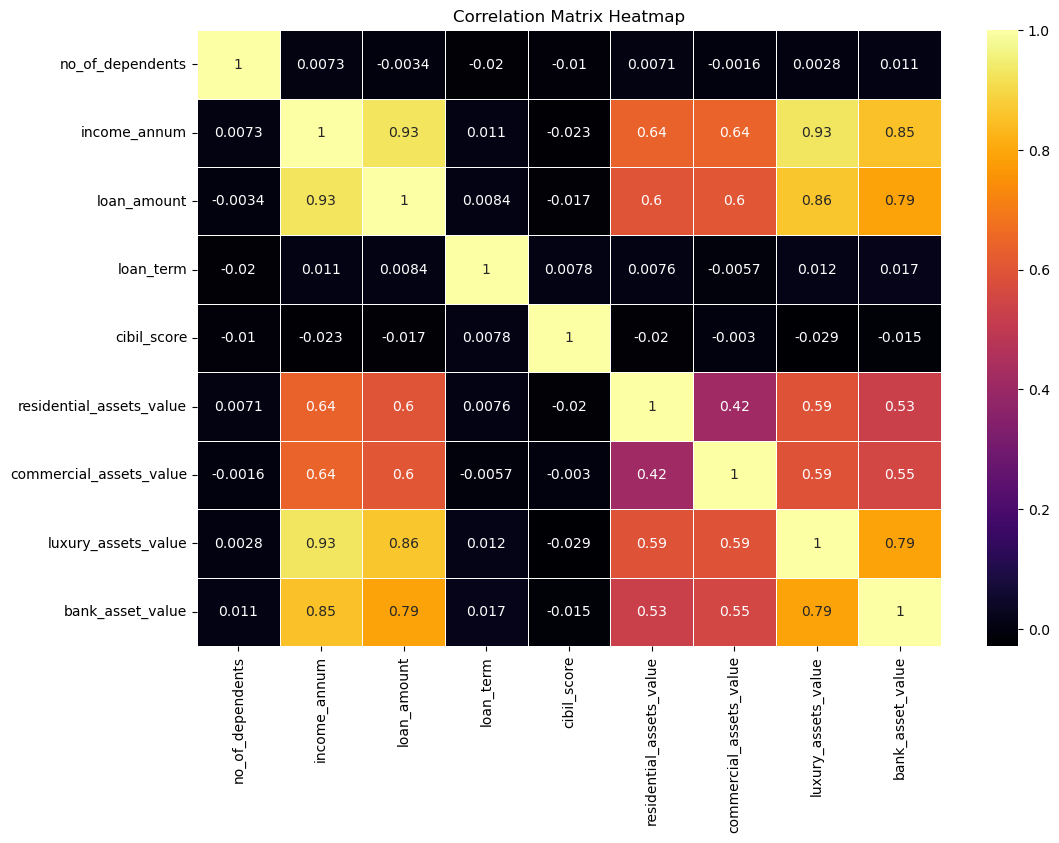

In [26]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()

**Column Encoding**




In [27]:
df.dtypes

no_of_dependents              int64
education                    object
self_employed                object
income_annum                  int64
loan_amount                   int64
loan_term                     int64
cibil_score                   int64
residential_assets_value    float64
commercial_assets_value     float64
luxury_assets_value           int64
bank_asset_value            float64
loan_status                  object
dtype: object

In [28]:
# education
df['education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [29]:
df['education'].value_counts()

Graduate        2144
Not Graduate    2125
Name: education, dtype: int64

In [30]:
# self_employed
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
df['self_employed'].value_counts()

Yes    2150
No     2119
Name: self_employed, dtype: int64

In [32]:
# loan_status - Target Variabel
df['loan_status'].unique()

array(['Approved', 'Rejected'], dtype=object)

In [33]:
df['loan_status'].value_counts()

Approved    2656
Rejected    1613
Name: loan_status, dtype: int64

In [34]:
# Encoding  Columns
df_encoded = df.copy()
# education
df_encoded.loc[df_encoded['education']=='Graduate', 'education'] = 1
df_encoded.loc[df_encoded['education']=='Not Graduate', 'education'] = 0

# self_employed
df_encoded.loc[df_encoded['self_employed']=='Yes', 'self_employed'] = 1
df_encoded.loc[df_encoded['self_employed']=='No', 'self_employed'] = 0

# Loan_status
df_encoded.loc[df_encoded['loan_status']=='Approved', 'loan_status'] = 1
df_encoded.loc[df_encoded['loan_status']=='Rejected', 'loan_status'] = 0

In [35]:
print(df_encoded.shape)
print(df_encoded.columns)

(4269, 12)
Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


In [36]:
df_encoded.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000.0,16732000.0,22700000,8000000.0,1
1,0,0,1,4100000,12200000,8,417,2700000.0,2200000.0,8800000,3300000.0,0
2,3,1,0,9100000,29700000,20,506,7100000.0,4500000.0,33300000,12800000.0,0
3,3,1,0,8200000,30700000,8,467,18200000.0,3300000.0,23300000,7900000.0,0
4,5,0,1,9800000,24200000,20,382,12400000.0,8200000.0,29400000,5000000.0,0


In [37]:
# value count %
print('loan_status-0 (%):',(df_encoded['loan_status'].value_counts()[0]/df_encoded['loan_status'].shape[0])*100)
print('loan_status-1 (%):',(df_encoded['loan_status'].value_counts()[1]/df_encoded['loan_status'].shape[0])*100)

loan_status-0 (%): 37.78402436167721
loan_status-1 (%): 62.215975638322796


**Dividing Data Into Independent and Dependent Variables**

In [38]:
x = df_encoded.drop(['loan_status'],axis=1)
y = df_encoded['loan_status'].astype('category')
print(x.shape)
print(y.shape)

(4269, 11)
(4269,)


**Train Test Split**

In [39]:
# Spliting Data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2988, 11)
(1281, 11)
(2988,)
(1281,)


**Data Scaling**

In [40]:
# Standard Scaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [41]:
x_train_sc[:5]

array([[ 0.93571344, -1.00739009, -1.0148356 , -0.80804784, -0.76001369,
         0.52634731, -1.2697434 , -0.65125658, -0.88698622, -0.66673165,
        -1.07420357],
       [ 0.3421016 , -1.00739009,  0.98538127,  1.70947574,  0.57116269,
        -1.22540782,  1.52250274,  2.75688138, -0.31131619,  2.32080181,
         2.42498978],
       [ 0.93571344,  0.99266412,  0.98538127, -0.55984129, -0.4959787 ,
        -0.52470577,  1.6263466 , -1.11181576, -0.61066461, -0.7430555 ,
        -0.919372  ],
       [ 0.3421016 , -1.00739009, -1.0148356 ,  0.46844299,  0.85720059,
        -0.52470577, -0.467838  ,  0.715069  ,  1.48477431,  0.08560342,
        -0.36197837],
       [-0.25151024,  0.99266412,  0.98538127, -0.63075745, -0.93603701,
        -0.52470577,  1.40712067, -0.94294406, -0.08104818, -0.31782263,
        -0.54777625]])

# **Model Training**

In [42]:
# Funct to evaluate model
def eval_model_classification(x_train, x_test, y_train, y_test, model, mname):
    # Fit the model
    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    clf_rep = classification_report(y_test, y_pred)

    # Create a DataFrame for the results
    res_df = pd.DataFrame({
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1_Score': [f1]
    }, index=[mname])

    return res_df, clf_rep

**Random Forest Without Feature Selection**

In [43]:
# Initialization of Random Forest
rf = RandomForestClassifier()

rf_res = eval_model_classification(x_train_sc, x_test_sc, y_train, y_test, rf, "Random Forest Classifier")
rf_res[0]

,Accuracy,Precision,Recall,F1_Score
Random Forest Classifier,0.9758,0.975804,0.9758,0.97575


In [44]:
# Classification Report
print('Classification Report for Random Forest Classifier:\n\n',rf_res[1])

Classification Report for Random Forest Classifier:

               precision    recall  f1-score   support

           0       0.98      0.96      0.97       471
           1       0.98      0.99      0.98       810

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.97      1281
weighted avg       0.98      0.98      0.98      1281



**Feature Importance**

In [45]:
# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to view feature importances
feature_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

threshold = 0.017
important_features = feature_importances[feature_importances['Importance'] > threshold]

print("\nImportant Features are:")
print(important_features)

Feature Importances:
                     Feature  Importance
6                cibil_score    0.821270
5                  loan_term    0.055390
4                loan_amount    0.027269
7   residential_assets_value    0.017428
9        luxury_assets_value    0.017300
8    commercial_assets_value    0.016892
3               income_annum    0.016140
10          bank_asset_value    0.015411
0           no_of_dependents    0.007720
2              self_employed    0.002853
1                  education    0.002328

Important Features are:
                    Feature  Importance
6               cibil_score    0.821270
5                 loan_term    0.055390
4               loan_amount    0.027269
7  residential_assets_value    0.017428
9       luxury_assets_value    0.017300


**Splitiing after feature Selection**

In [46]:
# Removing no_of_dependents, self_employed and education from x
x = x.drop(['no_of_dependents', 'self_employed','education'], axis=1)

In [47]:
# Spliting of data
# Spliting Data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2988, 8)
(1281, 8)
(2988,)
(1281,)


**KNN**

In [48]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_res = eval_model_classification(x_train_sc, x_test_sc, y_train, y_test, knn, "KNN")
knn_res[0]

,Accuracy,Precision,Recall,F1_Score
KNN,0.876659,0.879584,0.876659,0.877485


In [49]:
print('Classification Report for Logistic Reg:\n\n', knn_res[1])

Classification Report for Logistic Reg:

               precision    recall  f1-score   support

           0       0.81      0.87      0.84       471
           1       0.92      0.88      0.90       810

    accuracy                           0.88      1281
   macro avg       0.87      0.87      0.87      1281
weighted avg       0.88      0.88      0.88      1281



**Logistic Regression**

In [50]:
# Initialization of Logistic model
lm = LogisticRegression()

lm_res = eval_model_classification(x_train_sc, x_test_sc, y_train, y_test, lm, "Logistic Regression")
lm_res[0]

,Accuracy,Precision,Recall,F1_Score
Logistic Regression,0.903201,0.903291,0.903201,0.903243


In [51]:
# Classification Report
print('Classification Report for Logistic Reg:\n\n',lm_res[1])

Classification Report for Logistic Reg:

               precision    recall  f1-score   support

           0       0.87      0.87      0.87       471
           1       0.92      0.92      0.92       810

    accuracy                           0.90      1281
   macro avg       0.90      0.90      0.90      1281
weighted avg       0.90      0.90      0.90      1281



**Decision Tree Classifier**

In [52]:
# Initialization of Decision Tree model
dt = DecisionTreeClassifier()

dt_res = eval_model_classification(x_train_sc, x_test_sc, y_train, y_test, dt, "Decision Tree Classifier")
dt_res[0]

,Accuracy,Precision,Recall,F1_Score
Decision Tree Classifier,0.9758,0.975786,0.9758,0.975762


In [53]:
# Classification Report
print('Classification Report for Decision Tree Classifier:\n\n',dt_res[1])

Classification Report for Decision Tree Classifier:

               precision    recall  f1-score   support

           0       0.97      0.96      0.97       471
           1       0.98      0.99      0.98       810

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.97      1281
weighted avg       0.98      0.98      0.98      1281



**Random Forest**

In [54]:
# Initialization of Random Forest
rf = RandomForestClassifier()

rf_res = eval_model_classification(x_train_sc, x_test_sc, y_train, y_test, rf, "Random Forest Classifier")
rf_res[0]

,Accuracy,Precision,Recall,F1_Score
Random Forest Classifier,0.976581,0.976577,0.976581,0.976538


In [55]:
# Classification Report
print('Classification Report for Random Forest Classifier:\n\n',rf_res[1])

Classification Report for Random Forest Classifier:

               precision    recall  f1-score   support

           0       0.98      0.96      0.97       471
           1       0.98      0.99      0.98       810

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.97      1281
weighted avg       0.98      0.98      0.98      1281



**Gradient Boosting**

In [56]:
grb = GradientBoostingClassifier()

grb_res = eval_model_classification(x_train_sc, x_test_sc, y_train, y_test, grb, "Gradient Boosting Classifier")
grb_res[0]

,Accuracy,Precision,Recall,F1_Score
Gradient Boosting Classifier,0.97502,0.975109,0.97502,0.974938


In [57]:
# Classification Report
print('Classification Report for Gradient Boosting Classifier:\n\n',grb_res[1])

Classification Report for Gradient Boosting Classifier:

               precision    recall  f1-score   support

           0       0.98      0.95      0.97       471
           1       0.97      0.99      0.98       810

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.97      1281
weighted avg       0.98      0.98      0.97      1281



In [58]:
xgb_ = XGBClassifier()

xgb_res = eval_model_classification(x_train_sc, x_test_sc, y_train, y_test, xgb_, "XGBoost Classifier")
xgb_res[0]

,Accuracy,Precision,Recall,F1_Score
XGBoost Classifier,0.978142,0.978123,0.978142,0.978122


In [59]:
# Classification Report
print('Classification Report for Gradient Boosting Classifier:\n\n',xgb_res[1])

Classification Report for Gradient Boosting Classifier:

               precision    recall  f1-score   support

           0       0.97      0.97      0.97       471
           1       0.98      0.99      0.98       810

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



In [60]:
pd.concat([knn_res[0], lm_res[0], dt_res[0], rf_res[0], grb_res[0], xgb_res[0]], axis=0)

,Accuracy,Precision,Recall,F1_Score
KNN,0.876659,0.879584,0.876659,0.877485
Logistic Regression,0.903201,0.903291,0.903201,0.903243
Decision Tree Classifier,0.975800,0.975786,0.975800,0.975762
Random Forest Classifier,0.976581,0.976577,0.976581,0.976538
Gradient Boosting Classifier,0.975020,0.975109,0.975020,0.974938
XGBoost Classifier,0.978142,0.978123,0.978142,0.978122


In [61]:
# Define the cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the evaluation metric
scorer = make_scorer(accuracy_score)

# Perform cross-validation
scores = cross_val_score(xgb_, x, y, cv=kf, scoring=scorer)

# Review the results
print(f'Cross-Validation Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')
print(f'Standard Deviation: {scores.std()}')

Cross-Validation Scores: [0.98126464 0.98477752 0.9824356  0.98711944 0.98124267]
Mean Accuracy: 0.9833679725229318
Standard Deviation: 0.0022746671173131568


In [62]:
# param_grid = {
#     'eta': [0.01, 0.1, 0.3],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'n_estimators': [50, 100, 150]
# }

# # Define the scoring metric
# scorer = make_scorer(accuracy_score)

# # Perform grid search
# grid_search = GridSearchCV(
#     estimator=xgb_,
#     param_grid=param_grid,
#     scoring=scorer,
#     cv=5,
#     verbose=1,
#     n_jobs=-1
# )

# grid_search.fit(x, y)

# # Review the best parameters
# print(f'Best parameters found: {grid_search.best_params_}')
# print(f'Best cross-validation score: {grid_search.best_score_}')

In [63]:
param_grid = {
    'eta': [ 0.1, 0.2,0.3],
    'max_depth': [ 7, 8, 9],
    'subsample': [0.8, 0.9,1.0],
    'colsample_bytree': [ 0.8, 1.0, 1.1, 1.2],
    'n_estimators': [100, 150, 200]
}

# Define the scoring metric
scorer = make_scorer(accuracy_score)

# Perform grid search
grid_search = GridSearchCV(
    estimator=xgb_,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x, y)

# Review the best parameters
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found: {'colsample_bytree': 1.0, 'eta': 0.1, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8}
Best cross-validation score: 0.9847739484008775


In [64]:
# {'colsample_bytree': 1.0, 'eta': 0.1, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8}

In [65]:
# XGBoost Final Model
final_model = XGBClassifier(colsample_bytree= 1.0, eta= 0.1, max_depth =8, n_estimators =150, subsample =0.8)

model_res = eval_model_classification(x_train_sc, x_test_sc, y_train, y_test, final_model, "XGBoost")
model_res[0]

,Accuracy,Precision,Recall,F1_Score
XGBoost,0.97502,0.974998,0.97502,0.974986


In [66]:
# Classification Report
print('Classification Report for Gradient Boosting Classifier:\n\n',model_res[1])

Classification Report for Gradient Boosting Classifier:

               precision    recall  f1-score   support

           0       0.97      0.96      0.97       471
           1       0.98      0.98      0.98       810

    accuracy                           0.98      1281
   macro avg       0.97      0.97      0.97      1281
weighted avg       0.97      0.98      0.97      1281



**Conclusion: XGBoost Is the best model which is giving 97% acc at train and 98% at test data**

Saving the model in pickel file

In [67]:
# Saving model in pkl file
import joblib

# Save the model
joblib.dump(final_model, 'model.pkl')


['model.pkl']